 # 활동이 활발한 혈맹에 소속된 캐릭일수록 이탈이 적은가?

In [5]:
# 1. 활발한 혈맹을 조사
# 2. 이탈률을 조사
# 3. 위 두개를 합쳐봄

In [103]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [252]:
df = pd.read_csv('C:/Users/CPB06GameN/Documents/GitHub/bigcon/train_pledge.csv')
# df_combat = pd.read_csv('C:/Users/CPB06GameN/Documents/GitHub/bigcon/train_combat.csv')
# df.columns
# df['pledge_id']
# # df

In [256]:
x=df.groupby('char_id').mean()
char_pledge=x[['pledge_id']]

In [14]:
pledge_mean = df.groupby('pledge_id').mean()
pledge_mean.columns

Index(['day', 'acc_id', 'char_id', 'play_char_cnt', 'combat_char_cnt',
       'pledge_combat_cnt', 'random_attacker_cnt', 'random_defender_cnt',
       'same_pledge_cnt', 'temp_cnt', 'etc_cnt', 'combat_play_time',
       'non_combat_play_time'],
      dtype='object')

In [15]:
# 여기서 잠깐, 활발하다는 기준은?
# 1) 접속된 혈맹 캐릭터 수가 많다
# 2) 전투에 참여한 캐릭터가 많다
# 3) 혈맹 전투 횟수가 많다
# 4) 단발성 전투가 많다
# 5) 막피가 많다
# 6) 동일 혈맹 전투 횟수가 많다
# 7) 기타 전투 횟수
# 8) 전투 캐릭터 플레이 시간
# 9) 비전투 캐릭터 플레이 시간
# 결국 다 봐야하네;;;;;

In [38]:
# pledge_mean.corr()

In [17]:
#  combat_char_cnt / play_char_cnt = 0.850290
#  etc_cnt / combat_char_cnt =  0.796864
#  combat_play_time /  combat_char_cnt = 0.775836
#  combat_play_time /  play_char_cnt = 0.754274

In [37]:
# df.corr()
#  혈맹 전투로 평균 낸 것에서 상관을 찾아야 하는지 아니면 전체에서 상관을 찾아야 하는지 쫌 헷갈림

In [36]:
# pledge_mean

In [2]:
# # 1) 접속된 혈맹 캐릭터 수가 많다 - 순서대로 혈맹 정렬
# pledge_mean['play_char_cnt']
# # pledge_mean['play_char_cnt'].sort_values(ascending=False)

In [3]:
# # 2) 전투에 참여한 캐릭터가 많다 - 순서대로 혈맹 정렬
# pledge_mean['combat_char_cnt']
# # pledge_mean['combat_char_cnt'].sort_values(ascending=False)

In [5]:
# 3) 혈맹 전투 횟수가 많다 - 순서대로 혈맹 정렬
# pledge_mean['pledge_combat_cnt']
# pledge_mean['pledge_combat_cnt'].sort_values(ascending=False)

In [6]:
# # 4) 단발성 전투가 많다 - 순서대로 혈맹 정렬
# pledge_mean['temp_cnt']
# pledge_mean['temp_cnt'].sort_values(ascending=False)

In [7]:
# # 5) 막피가 공격이 많다 - 순서대로 혈맹 정렬
# pledge_mean['random_attacker_cnt']
# pledge_mean['random_attacker_cnt'].sort_values(ascending=False)

In [8]:
# # 5-1) 막피가 당한 것이 많다 - 순서대로 혈맹 정렬
# pledge_mean['random_defender_cnt']
# pledge_mean['random_defender_cnt'].sort_values(ascending=False)

In [9]:
# # 6) 동일 혈맹 전투 횟수가 많다 - 순서대로 혈맹 정렬
# pledge_mean['same_pledge_cnt']
# pledge_mean['same_pledge_cnt'].sort_values(ascending=False)

In [10]:
# # 7) 기타 전투 횟수 - 순서대로 혈맹 정렬
# pledge_mean['etc_cnt']
# pledge_mean['etc_cnt'].sort_values(ascending=False)

In [11]:
# # 8) 전투 캐릭터 플레이 시간 - 순서대로 혈맹 정렬
# pledge_mean['combat_play_time']
# pledge_mean['combat_play_time'].sort_values(ascending=False)

In [12]:
# # 9) 비전투 캐릭터 플레이 시간 - 순서대로 혈맹 정렬
# pledge_mean['non_combat_play_time']
# pledge_mean['non_combat_play_time'].sort_values(ascending=False)


In [63]:
# 행의 갯수를 파악(=혈맹의 갯수)
a = pledge_mean['non_combat_play_time']
a.shape

(21860,)

In [62]:
# 혈맹의 갯수 21860 행
# 10개의 등급으로 나눕니다
# 각 등급에 2186개씩 들어감
# 등급으로 캐릭을 매겨보고
# 이탈율과 비교해보자
# 도와줘 재미낭!!

# 어떤 혈맹이 이탈이 적은가. 이탈이 적은 혈맹은 어떤 변수와 관계가 있을까.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
df_pledge = pd.read_csv('C:/Users/CPB06GameN/Documents/GitHub/bigcon/train_pledge.csv')
df_label = pd.read_csv('C:/Users/CPB06GameN/Documents/GitHub/bigcon/train_label.csv')

In [18]:
# df_pledge.sort_values('acc_id')

# df_label.sort_values('acc_id')

In [215]:
# acc_id 로 오름차순 정렬
df_pledge=df_pledge.sort_values(by=['acc_id'])
df_label=df_label.sort_values(by=['acc_id'])
# print(df_pledge)
# print(df_label)

In [73]:
# df_pledge=df_pledge.groupby('acc_id').mean()
# df_pledge

In [216]:
# 단 혈맹을 하지 않는 유저들은 우선 제외.

df_pledge_label=pd.merge(df_pledge,df_label,how='inner',on='acc_id')
# pd.merge(df_pledge,df_label, how = 'outer')
# pd.merge(df_pledge,df_label, how = 'outer')
df_pledge_label

,day,acc_id,char_id,server,pledge_id,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time,survival_time,amount_spent
0,14,5,321231,aq,25467,0.396983,0.180447,0.000000,0.000000,0.000000,0.000000,0.197766,0.219426,0.441895,0.000000,60,0.000000
1,22,5,321231,aq,25467,0.613518,0.252625,0.000000,0.548695,0.357657,0.000000,0.098883,0.092017,0.610198,0.000000,60,0.000000
2,22,5,175813,aq,17370,0.072179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000463,60,0.000000
3,23,5,321231,aq,25467,0.396983,0.036089,0.000000,0.710075,0.000000,0.000000,0.000000,0.000000,0.339385,0.000000,60,0.000000
4,20,5,321231,aq,25467,0.505250,0.108268,0.000000,0.000000,0.071531,0.000000,0.296649,0.056626,0.593982,0.000000,60,0.000000
5,22,5,22260,aq,28441,0.036089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000232,60,0.000000
6,27,5,22260,aq,28441,0.072179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000695,60,0.000000
7,9,5,321231,aq,25467,0.649608,0.252625,0.000000,0.000000,0.143063,0.000000,0.692181,0.120331,0.399849,0.000000,60,0.000000
8,24,5,22260,aq,28441,0.036089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000463,60,0.000000
9,24,5,175813,aq,17370,0.072179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000927,60,0.000000


In [227]:
# level 이 없다.
# df_char=df_pledge_label.groupby('char_id').mean()
# df_char['level']

In [80]:
# 질문? : 밑에 것으로 한다면 혈맹을 제외한 모든 것이 평균이 나와 버린다.
# df_pledge_label.groupby(['pledge_id']).mean()

In [83]:
df_drop=df_pledge_label.groupby(['pledge_id']).mean()
df_drop

,day,acc_id,char_id,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time,survival_time,amount_spent
pledge_id,,,,,,,,,,,,,,,
2,12.000000,39448.000000,277729.000000,0.036089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.895776e-04,9.000000,0.003642
3,16.699099,66158.003604,222961.962162,1.149851,0.903794,1.181865,0.909955,0.201061,0.888909,1.067402,1.236260,1.694344,1.252227e-06,51.846847,0.253125
4,15.500000,115041.000000,381686.000000,0.036089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.316621e-04,47.000000,0.020737
8,14.555556,26157.000000,173894.000000,0.036089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.093960e-03,64.000000,0.399999
9,1.000000,111407.000000,2663.000000,0.036089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.158310e-04,64.000000,0.556246
12,14.666667,36990.000000,357511.333333,0.044510,0.031277,0.000000,0.000000,0.000000,0.000000,0.032961,0.022650,0.049143,5.722053e-03,64.000000,0.000000
14,16.000000,69745.000000,215486.000000,0.036089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.474931e-04,29.000000,0.011189
17,13.838710,112443.000000,183242.645161,0.045403,0.002328,0.000000,0.000000,0.002307,0.000000,0.000000,0.000228,0.001730,2.970132e-02,1.000000,0.000000
18,12.416667,97232.000000,290590.000000,0.036089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.826293e-04,11.000000,0.000000


In [86]:
# 혈맹을 기준으로 변수들 상관관계를 볼 수 있는 데이터
df_corr = df_drop.drop(columns=['day','acc_id','char_id'])

In [88]:
# 혈맹과 생존을 볼 수 있는 데이터
# 혈맹별 혈맹원들의 평균생존율
df_pledge_survi = df_drop.drop(columns=['day','amount_spent','acc_id','char_id','play_char_cnt','combat_char_cnt','pledge_combat_cnt','random_attacker_cnt','random_defender_cnt','same_pledge_cnt','temp_cnt','etc_cnt','combat_play_time','non_combat_play_time'])

In [162]:
df_pledge_survi

,survival_time
pledge_id,
2,9.000000
3,51.846847
4,47.000000
8,64.000000
9,64.000000
12,64.000000
14,29.000000
17,1.000000
18,11.000000


In [99]:
#  생존 기간에 따라 10단계로 나눈 후 혈맹들의 분포를 파악

label_1 = df_pledge_survi[df_pledge_survi['survival_time'] < 8]
label_2 = df_pledge_survi[(df_pledge_survi['survival_time'] >= 8)&(df_pledge_survi['survival_time'] < 15)]
label_3 = df_pledge_survi[(df_pledge_survi['survival_time'] >= 15)&(df_pledge_survi['survival_time'] < 22)]
label_4 = df_pledge_survi[(df_pledge_survi['survival_time'] >= 22)&(df_pledge_survi['survival_time'] < 29)]
label_5 = df_pledge_survi[(df_pledge_survi['survival_time'] >= 29)&(df_pledge_survi['survival_time'] < 36)]
label_6 = df_pledge_survi[(df_pledge_survi['survival_time'] >= 36)&(df_pledge_survi['survival_time'] < 43)]
label_7 = df_pledge_survi[(df_pledge_survi['survival_time'] >= 29)&(df_pledge_survi['survival_time'] < 50)]
label_8 = df_pledge_survi[(df_pledge_survi['survival_time'] >= 50)&(df_pledge_survi['survival_time'] < 57)]
label_9 = df_pledge_survi[(df_pledge_survi['survival_time'] >= 57)&(df_pledge_survi['survival_time'] < 64)]
label_10 = df_pledge_survi[(df_pledge_survi['survival_time'] == 64)]

In [229]:
# 이탈이 적은 혈맹은 어떤 속성이 있을까?
# 이탈이 적은 혈맹 = worhkd
# label_10

In [230]:
# worhkd 안에서의 상관 관계
worhkd = pd.merge(label_10,df_pledge,how='inner',on='pledge_id')
worhkd1=worhkd.groupby(['pledge_id']).mean()
worhkd2 = worhkd1.drop(columns=['day','acc_id','char_id'])
# worhkd2.corr()

In [140]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [231]:
worhkd2 = worhkd1.drop(columns=['day','acc_id','char_id'])
worhkd2

,survival_time,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time
pledge_id,,,,,,,,,,,
8,64.0,0.036089,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.001094
9,64.0,0.036089,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000116
12,64.0,0.044510,0.031277,0.000000,0.000000,0.000000,0.0,0.032961,0.022650,0.049143,0.005722
21,64.0,0.060782,0.003799,0.000000,0.000000,0.000000,0.0,0.046839,0.000000,0.000177,0.002823
22,64.0,0.036089,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000203
24,64.0,0.036089,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000463
26,64.0,0.036089,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000212
27,64.0,0.036089,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000268
37,64.0,0.036089,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000116


In [232]:
# worhkd2
# x = ['홍길동', '임철수', '김동민', '서장훈']
# kor = [90,77,50,80]
# eng = [60,20,50,20]
# plt.bar(x, kor)
# plt.bar(x, eng)
# # 범례(legend)
# plt.legend(['국어','영어'])
# plt.show()

# x = worhkd2.index
# y = worhkd2.play_char_cnt
# plt.bar(x,y)
# # plt.bar(x,y)
# plt.show()

In [169]:
total = [i+k+j for i,j,k in zip(kor,eng,math)]
korBar = [i/k*100 for i,k in zip(kor, total)]
engBar = [i/k*100 for i,k in zip(eng, total)]
mathBar = [i/k*100 for i,k in zip(math, total)]

plt.bar(name, korBar, width=0.85)
plt.bar(name, engBar, bottom = korBar, width=0.85)
plt.bar(name, mathBar, bottom = [i+k for i,k in zip(korBar, engBar)], width=0.85)


korBar = np.array(korBar)
engBar = np.array(engBar)
mathBar = np.array(mathBar)

for x, y, val in zip(name, korBar/2, korBar):
    plt.text(x, y, '{0:.1f}%'.format(val), ha="center", va="bottom")
for x, y, val in zip(name, korBar+engBar/2, engBar):
    plt.text(x, y, '{0:.1f}%'.format(val), ha="center", va="center")
for x, y, val in zip(name, korBar+engBar+mathBar/2, mathBar):
    plt.text(x, y, '{0:.1f}%'.format(val), ha="center", va="top")
plt.legend(['국어','영어','수학'])
plt.show()

NameError: name 'math' is not defined

# 도니형

In [175]:
import pandas as pd



activity = pd.read_csv('C:/Users/CPB06GameN/Documents/GitHub/bigcon/train_activity.csv')
label = pd.read_csv('C:/Users/CPB06GameN/Documents/GitHub/bigcon/train_label.csv')
combat = pd.read_csv('C:/Users/CPB06GameN/Documents/GitHub/bigcon/train_combat.csv')


In [185]:
# activity와 label을 우선적으로 merge
meg_act_lab = pd.merge(label, activity, how = 'inner', on = 'acc_id')
# print(meg_act_lab.head())
# print(meg_act_lab.columns)
# print(label.columns)
# print(combat.columns)

In [177]:
# char_id 기준으로 groupby.sum() / activity에서 사용할 columns 추출
activity_group = activity.groupby('char_id').sum()[['playtime', 'npc_kill', 'solo_exp', 'party_exp',
                                                  'quest_exp','boss_monster', 'death', 'revive', 'exp_recovery',
                                                  'fishing','private_shop', 'game_money_change', 'enchant_count']]


In [178]:
# char_id 기준으로 groupby.sum() / combat에서 사용할 columns 추출
combat_group = combat.groupby('char_id').sum()[['pledge_cnt','random_attacker_cnt', 'random_defender_cnt', 'temp_cnt',
                                                  'same_pledge_cnt','etc_cnt','num_opponent']]


In [211]:
# char_id 기준 level 추출
combat_lv = combat.groupby('char_id').max()['level']

In [180]:
# char_id 를 label 에 추가하는 과정
selected_group = meg_act_lab[['acc_id', 'char_id', 'survival_time', 'amount_spent']]

In [181]:
# char_id를 기준으로 level 과 acc_id 를 추가하는 과정
# ( activity_group에 직접 추가를 해도 되지만, acc_id와 survival_time 이 필요하기 때문에 과정을 한번 더 거친다.)
selected_group2 = pd.merge(selected_group, combat_lv, how = 'inner', on = 'char_id')

In [182]:
# 이 부분에서 중복되는 것을 막기 위해 char_id를 기준으로 최대값들을 구해준다.
selected = selected_group2.groupby('char_id').max()

In [214]:
# 앞서 activity에서 사용할 colums을 추출한 데이터와 char_id를 기준으로 level, survival_time 등을 가져온 데이터를 merge
activity_group3 = pd.merge(activity_group, selected, how = 'inner', on = 'char_id')
activity_group3

,playtime,npc_kill,solo_exp,party_exp,quest_exp,boss_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count,acc_id,survival_time,amount_spent,level
char_id,,,,,,,,,,,,,,,,,
2,0.123246,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,12365,17,0.057321,11
3,2.732749,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,2.419238e-03,0.000000,121046,64,0.005119,11
5,1.012042,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,8885,64,0.098958,0
7,0.125616,0.033063,0.000000,0.321568,0.000000,1,0.000000,0.000000,0.0,0.000000,0.000000,7.580674e-05,0.000000,37934,64,0.038455,14
9,0.033182,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,107257,64,0.120679,0
13,14.315530,8.487013,2.287007,0.000000,0.171112,0,1.717588,1.480916,0.0,9.309953,0.000000,-2.886437e+00,0.000000,111704,17,0.000000,15
14,0.002370,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,44686,30,0.655893,0
15,0.040292,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,88391,64,0.015224,14
17,0.002370,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,111945,27,0.000000,0


In [207]:
combat_group1 = pd.merge(combat_group, selected, how = 'inner', on = 'char_id')

In [241]:
#캐릭터별 레벨 
char_level=combat_group1[['level']]

In [242]:
char_level

,level
char_id,
2,11
3,11
5,0
7,14
9,0
13,15
14,0
15,14
17,0


In [235]:
pd.merge(df_pledge_survi, activity_group3, how = 'inner', on = 'char_id')

KeyError: 'char_id'

In [ ]:
# 혈맹과 생존
df_pledge_survi

# 캐릭터별 레벨 
char_level=combat_group1[['level']]

# 캐릭과 혈맹
char_pledge=x[['pledge_id']]

In [258]:
char_lev_ple=pd.merge(char_level,char_pledge,how='inner',on='char_id')

In [260]:
x=pd.merge(df_pledge_survi,char_lev_ple, how='inner', on='pledge_id')

In [264]:
xx = x.groupby('pledge_id').mean()
xx

,survival_time,level
pledge_id,,
2,9.000000,10.000000
3,51.846847,16.562500
4,47.000000,9.000000
8,64.000000,11.000000
9,64.000000,8.000000
12,64.000000,15.000000
14,29.000000,6.000000
17,1.000000,13.333333
18,11.000000,10.000000


In [266]:
#  생존 기간에 따라 10단계로 나눈 후 혈맹들의 분포를 파악

label_1 = xx[xx['survival_time'] < 8]
label_2 = xx[(xx['survival_time'] >= 8)&(xx['survival_time'] < 15)]
label_3 = xx[(xx['survival_time'] >= 15)&(xx['survival_time'] < 22)]
label_4 = xx[(xx['survival_time'] >= 22)&(xx['survival_time'] < 29)]
label_5 = xx[(xx['survival_time'] >= 29)&(xx['survival_time'] < 36)]
label_6 = xx[(xx['survival_time'] >= 36)&(xx['survival_time'] < 43)]
label_7 = xx[(xx['survival_time'] >= 29)&(xx['survival_time'] < 50)]
label_8 = xx[(xx['survival_time'] >= 50)&(xx['survival_time'] < 57)]
label_9 = xx[(xx['survival_time'] >= 57)&(xx['survival_time'] < 64)]
label_10 = xx[(xx['survival_time'] == 64)]

In [292]:
# xx.loc[xx["survival_time"] == 64 , "label"] = 10
# xx.loc[(xx['survival_time'] >= 57)&(xx['survival_time'] < 64) , "label"] = 9
# xx.loc[(xx['survival_time'] >= 50)&(xx['survival_time'] < 57 , "label"] = 8
# xx.loc[(xx['survival_time'] >= 29)&(xx['survival_time'] < 50 , "label"] = 7
# xx.loc[(xx['survival_time'] >= 36)&(xx['survival_time'] < 43 , "label"] = 6
# xx.loc[(xx['survival_time'] >= 29)&(xx['survival_time'] < 36 , "label"] = 5
# xx.loc[(xx['survival_time'] >= 22)&(xx['survival_time'] < 29 , "label"] = 4
# xx.loc[(xx['survival_time'] >= 15)&(xx['survival_time'] < 22 , "label"] = 3
# xx.loc[(xx['survival_time'] >= 8)&(xx['survival_time'] < 15 , "label"] = 2
xx.loc[xx['survival_time'] < 8, "label"] = 1
xx.loc[xx['survival_time'] >= 8, "label"] = 2
xx.loc[xx['survival_time'] >= 15, "label"] = 3
xx.loc[xx['survival_time'] >= 22, "label"] = 4
xx.loc[xx['survival_time'] >= 29, "label"] = 5
xx.loc[xx['survival_time'] >= 36, "label"] = 6
xx.loc[xx['survival_time'] >= 29, "label"] = 7
xx.loc[xx['survival_time'] >= 50, "label"] = 8
xx.loc[xx['survival_time'] >= 57, "label"] = 9
xx.loc[xx["survival_time"] == 64 , "label"] = 10

In [302]:
# box 프롯할 데이터
xx

,survival_time,level,label
pledge_id,,,
2,9.000000,10.000000,2.0
3,51.846847,16.562500,8.0
4,47.000000,9.000000,7.0
8,64.000000,11.000000,10.0
9,64.000000,8.000000,10.0
12,64.000000,15.000000,10.0
14,29.000000,6.000000,7.0
17,1.000000,13.333333,1.0
18,11.000000,10.000000,2.0


In [350]:
# label 순서대로 정렬
xxx=xx.sort_values('label')

In [351]:
a=xxx.reset_index()

In [352]:
xxxx = a.set_index("label")

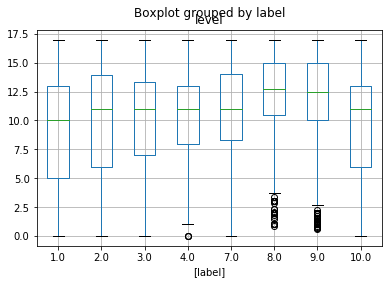

In [357]:
# 완성 ㅠㅠㅠㅠ 박수 한번 쳐줘라 ㅠㅠㅠ
xxxx
xxxx.boxplot(column=['level'],by=['label'])
plt.show()